In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
train = pd.read_csv("train.csv")
test = pd.read_csv('testdata.csv')
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
# 定义dummies函数，将某个离散型特征的所有取值变为特征
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# get rid of the useless cols
dropping = ['PassengerId', 'Name', 'Ticket']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

3    491
1    216
2    184
Name: Pclass, dtype: int64


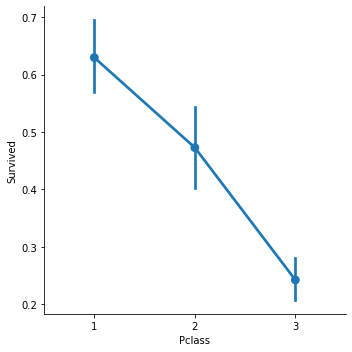

In [44]:
# 观察Pclass和survived的关系，等级越高，生还率越大
print(train.Pclass.value_counts())
sns.factorplot("Pclass",'Survived',data=train,order=[1,2,3])

train, test = dummies('Pclass',train,test)

male      577
female    314
Name: Sex, dtype: int64


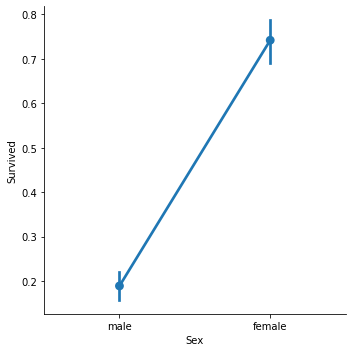

In [45]:
#观察Sex和Survived的关系，女性生还率显著高于男性分解Sex为male，female，并删除原特征
print(train.Sex.value_counts(dropna=False))
sns.factorplot('Sex','Survived',data=train)
train,test = dummies('Sex',train,test)
train.drop('male',axis=1,inplace=True)
test.drop('male',axis=1,inplace=True)

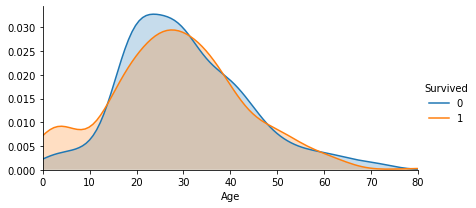

In [46]:
nan_num = len(train[train['Age'].isnull()])
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling
nan_num = train['Age'].isnull().sum()
# dealing the missing val in test
nan_num = test['Age'].isnull().sum()
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()

s = sns.FacetGrid(train,hue='Survived',aspect=2)
s.map(sns.kdeplot,'Age',shade=True)
s.set(xlim=(0,train['Age'].max()))
s.add_legend()

def under15(row):
    result = 0.0
    if row<15:
        result = 1.0
    return result
def young(row):
    result = 0.0
    if row>=15 and row<30:
        result = 1.0
    return result
train['under15'] = train['Age'].apply(under15)
train['young'] = train['Age'].apply(young)
test['under15'] = test['Age'].apply(under15)
test['young'] = test['Age'].apply(young)

train.drop('Age',axis=1,inplace=True)
test.drop('Age',axis=1,inplace=True)

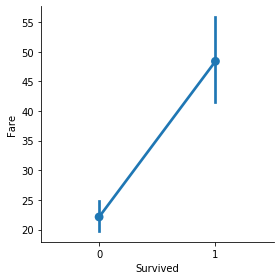

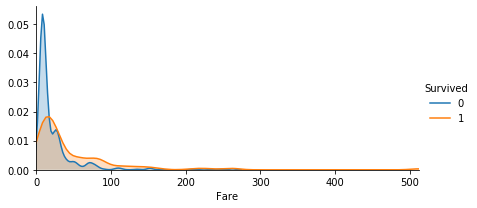

In [47]:
# fare 填充均值
train.Fare.isnull().sum()
test.Fare.isnull().sum()

sns.factorplot('Survived','Fare',data=train,size=4)
s = sns.FacetGrid(train,hue='Survived',aspect=2)
s.map(sns.kdeplot,'Fare',shade=True)
s.set(xlim=(0,train['Fare'].max()))
s.add_legend()

test['Fare'].fillna(test['Fare'].median(),inplace=True)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


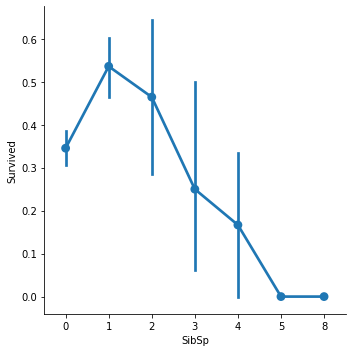

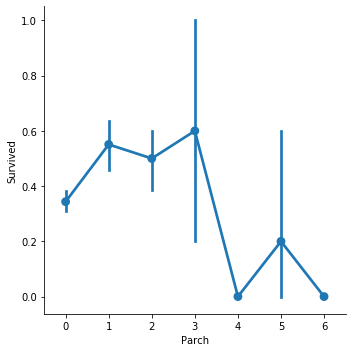

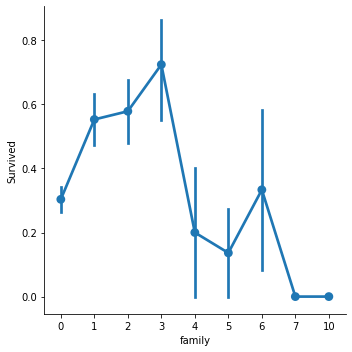

In [48]:
print (train.SibSp.value_counts(dropna=False))
print (train.Parch.value_counts(dropna=False))
sns.factorplot('SibSp','Survived',data=train,size=5)
sns.factorplot('Parch','Survived',data=train,szie=5)

train['family'] = train['SibSp'] +  train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.factorplot('family','Survived',data=train,size=5)

train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)
# 生成组合特征family = SibSp+Parch，删除原特征

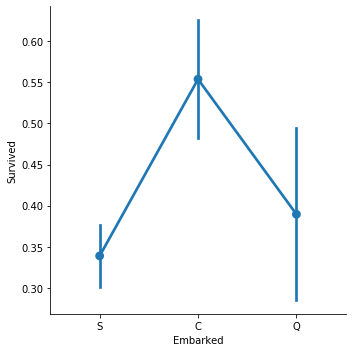

In [49]:
# Embarked训练集有两个缺失值，S出现最多，用S进行填充观察发现C港口的乘客生还率较高，分解Embarked为S, Q, C删除S，Q，Embarked. 保留C作为新特征

train['Embarked'].fillna('S',inplace=True)

sns.factorplot('Embarked','Survived',data=train,size=5)

train,test = dummies('Embarked',train,test)
train.drop(['S','Q'],axis=1,inplace=True)
test.drop(['S','Q'],axis=1,inplace=True)

In [50]:
#Cabin


train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [51]:
# 主要用逻辑回归，随机森林，支持向量机和k近邻
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold

def modeling(clf,ft,target):
    acc = cross_val_score(clf,ft,target,cv=kf)
    acc_lst.append(acc.mean())
    return 

accuracy = []
def ml(ft,target,time):
    accuracy.append(acc_lst)
     #logisticregression
    logreg = LogisticRegression()
    modeling(logreg,ft,target)
    #RandomForest
    rf = RandomForestClassifier(n_estimators=50,min_samples_split=4,min_samples_leaf=2)
    modeling(rf,ft,target)
    #svc
    svc = SVC()
    modeling(svc,ft,target)
    #knn
    knn = KNeighborsClassifier(n_neighbors = 3)
    modeling(knn,ft,target)
    
    
    # see the coefficient
    logreg.fit(ft,target)
    feature = pd.DataFrame(ft.columns)
    feature.columns = ['Features']
    feature["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
    print(feature)
    return

In [52]:
#test1，使用全部特征
train_ft = train.drop('Survived',axis=1)
train_y = train['Survived']

kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft,train_y,'test_1')

  Features  Coefficient Estimate
0     Fare              0.004206
1        1              0.393289
2        2             -0.220763
3        3             -1.230939
4   female              2.685586
5  under15              1.693733
6    young              0.108370
7   family             -0.308832
8        C              0.370866


In [53]:
# testing 2, lose young
train_ft_2=train.drop(['Survived','young'],axis=1)
test_2 = test.drop('young',axis=1)
train_ft.head()

# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst=[]
ml(train_ft_2,train_y,'test_2')

  Features  Coefficient Estimate
0     Fare              0.004285
1        1              0.386195
2        2             -0.207867
3        3             -1.202922
4   female              2.690898
5  under15              1.645827
6   family             -0.311682
7        C              0.376629


In [54]:
#test3, lose young, c
train_ft_3=train.drop(['Survived','young','C'],axis=1)
test_3 = test.drop(['young','C'],axis=1)
train_ft.head()

# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_3,train_y,'test_3')

  Features  Coefficient Estimate
0     Fare              0.004920
1        1              0.438557
2        2             -0.225821
3        3             -1.194444
4   female              2.694665
5  under15              1.679459
6   family             -0.322922


In [55]:
# test4, no FARE
train_ft_4=train.drop(['Survived','Fare'],axis=1)
test_4 = test.drop(['Fare'],axis=1)
train_ft.head()
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_4,train_y,'test_4')

  Features  Coefficient Estimate
0        1              0.566958
1        2             -0.249171
2        3             -1.304309
3   female              2.697132
4  under15              1.659582
5    young              0.120279
6   family             -0.268279
7        C              0.435195


In [56]:
# test5, get rid of c 
train_ft_5=train.drop(['Survived','C'],axis=1)
test_5 = test.drop('C',axis=1)

# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_5,train_y,'test_5')

  Features  Coefficient Estimate
0     Fare              0.004823
1        1              0.445568
2        2             -0.240222
3        3             -1.226261
4   female              2.689398
5  under15              1.734189
6    young              0.121678
7   family             -0.319610


In [57]:
# test6, lose Fare and young
train_ft_6=train.drop(['Survived','Fare','young'],axis=1)
test_6 = test.drop(['Fare','young'],axis=1)
train_ft.head()
# ml
kf = KFold(n_splits=3,random_state=1)
acc_lst = []
ml(train_ft_6,train_y,'test_6')

  Features  Coefficient Estimate
0        1              0.562814
1        2             -0.235606
2        3             -1.274657
3   female              2.702955
4  under15              1.604597
5   family             -0.270284
6        C              0.442288


In [60]:
accuracy_df=pd.DataFrame(data=accuracy,
                         index=['test1','test2','test3','test4','test5','test6'],
                         columns=['logistic','rf','svc','knn'])
accuracy_df

#选取正确率最高的svc算法，删除fare特征

,logistic,rf,svc,knn
test1,0.791246,0.814815,0.747475,0.740741
test2,0.791246,0.812570,0.764310,0.757576
test3,0.796857,0.818182,0.763187,0.757576
test4,0.793490,0.802469,0.830527,0.780022
test5,0.795735,0.808081,0.763187,0.738496
test6,0.790123,0.819304,0.831650,0.775533
